# Neural Network

In [139]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


print(tf.__version__)

2.0.0-beta1


# Reads in Preprocessed Data

In [ ]:
pickle_in = open("testing_data1.pickle", 'rb')
X = pickle.load(pickle_in)

pickle_in = open("labels.pickle", 'rb')
y = pickle.load(pickle_in)

# Sets up path to the 1st set of Test Frames 

# Also defines each of the 101 Categories

In [140]:
TestFrames1DIR = 'C:/Users/gosha/OneDrive/Documents/Summer Research/TestFrames1/'
CATEGORIES = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'Breaststroke', 'BrushingTeeth', 'CleanandJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen', 'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow', 'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PlayingCello', 'PlayingDaf', 'PlayingDhol', 'PlayingFlute', 'PlayingSitar', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'ShavingBeard', 'Shotput', 'SkateBoarding', 'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty', 'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot', 'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'Typing', 'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog', 'WallPushups', 'WritingOnBoard', 'YoYo']


# Reads in frames from the first 20 categories and saves to Numpy array

In [152]:
testing_data1 = []
catNum = 0
count = 0

for category in CATEGORIES:
    pathCat = os.path.join(TestFrames1DIR, category)
    pathVid = TestFrames1DIR + str(category)
    print(category)
    
    count+=1
    if(count > 20):
        break
        
    for video in os.listdir(pathVid): 
        pathImg = pathVid + '/' + str(video)
        #print(video)
        
        for img in os.listdir(pathImg):
            
            img_array = cv2.imread(pathImg + '/' + img)
            testing_data1.append([np.array(img_array), catNum])
            
    catNum += 1

ApplyEyeMakeup
ApplyLipstick
Archery
BabyCrawling
BalanceBeam
BandMarching
BaseballPitch
Basketball
BasketballDunk
BenchPress
Biking
Billiards
BlowDryHair
BlowingCandles
BodyWeightSquats
Bowling
BoxingPunchingBag
BoxingSpeedBag
Breaststroke
BrushingTeeth
CleanandJerk


# Shuffles the data

In [153]:
import random

random.shuffle(testing_data1)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0]


# Separates data into features (the images) and labels (the category)
# Feeds into variables X and y
# Transform X into Numpy array and reshape

In [154]:
X = []
y = []

for features, label in testing_data1:
    X.append(features)
    y.append(label)
    

X = np.array(X)
print(X.shape)
print(y[1])

(8431, 227, 227, 3)
0


# ignore this 

In [121]:
TrainFrames1DIR = 'C:/Users/gosha/OneDrive/Documents/Summer Research/TrainFrames1/'
catNum = 0
training_data1 = []

for category in CATEGORIES:
    pathCat = os.path.join(TrainFrames1DIR, category)
    pathVid = TrainFrames1DIR + str(category)
    print(category)
    
    for video in os.listdir(pathVid): 
        try:
            pathImg = pathVid + '/' + str(video)

            for img in os.listdir(pathImg):
                img_array = cv2.imread(pathImg + '/' + img)
                new_array = cv2.resize(img_array, (227, 277, 3))
                training_data1.append([new_array, catNum])
        except Exception as e:
            pass

    catNum += 1

ApplyEyeMakeup
v_ApplyEyeMakeup_g08_c02.avi
v_ApplyEyeMakeup_g08_c04.avi
v_ApplyEyeMakeup_g09_c01.avi
v_ApplyEyeMakeup_g09_c03.avi
v_ApplyEyeMakeup_g09_c05.avi
v_ApplyEyeMakeup_g09_c07.avi
v_ApplyEyeMakeup_g10_c02.avi
v_ApplyEyeMakeup_g10_c04.avi
v_ApplyEyeMakeup_g11_c01.avi
v_ApplyEyeMakeup_g11_c03.avi
v_ApplyEyeMakeup_g11_c05.avi
v_ApplyEyeMakeup_g12_c02.avi
v_ApplyEyeMakeup_g12_c04.avi
v_ApplyEyeMakeup_g12_c06.avi
v_ApplyEyeMakeup_g13_c02.avi
v_ApplyEyeMakeup_g13_c04.avi
v_ApplyEyeMakeup_g13_c06.avi
v_ApplyEyeMakeup_g14_c02.avi
v_ApplyEyeMakeup_g14_c04.avi
v_ApplyEyeMakeup_g15_c01.avi
v_ApplyEyeMakeup_g15_c03.avi
v_ApplyEyeMakeup_g15_c05.avi
v_ApplyEyeMakeup_g15_c07.avi
v_ApplyEyeMakeup_g16_c02.avi
v_ApplyEyeMakeup_g16_c04.avi
v_ApplyEyeMakeup_g17_c01.avi
v_ApplyEyeMakeup_g17_c03.avi
v_ApplyEyeMakeup_g17_c05.avi
v_ApplyEyeMakeup_g18_c02.avi
v_ApplyEyeMakeup_g18_c04.avi
v_ApplyEyeMakeup_g19_c01.avi
v_ApplyEyeMakeup_g19_c03.avi
v_ApplyEyeMakeup_g20_c01.avi
v_ApplyEyeMakeup_g20_c03.avi

v_BaseballPitch_g15_c04.avi
v_BaseballPitch_g15_c06.avi
v_BaseballPitch_g16_c01.avi
v_BaseballPitch_g16_c03.avi
v_BaseballPitch_g16_c05.avi
v_BaseballPitch_g17_c01.avi
v_BaseballPitch_g17_c03.avi
v_BaseballPitch_g17_c05.avi
v_BaseballPitch_g17_c07.avi
v_BaseballPitch_g18_c02.avi
v_BaseballPitch_g18_c04.avi
v_BaseballPitch_g18_c06.avi
v_BaseballPitch_g19_c01.avi
v_BaseballPitch_g19_c03.avi
v_BaseballPitch_g19_c05.avi
v_BaseballPitch_g20_c02.avi
v_BaseballPitch_g20_c04.avi
v_BaseballPitch_g21_c02.avi
v_BaseballPitch_g21_c04.avi
v_BaseballPitch_g22_c02.avi
v_BaseballPitch_g22_c04.avi
v_BaseballPitch_g22_c06.avi
v_BaseballPitch_g23_c01.avi
v_BaseballPitch_g23_c03.avi
v_BaseballPitch_g23_c05.avi
v_BaseballPitch_g23_c07.avi
v_BaseballPitch_g24_c02.avi
v_BaseballPitch_g24_c04.avi
v_BaseballPitch_g24_c06.avi
v_BaseballPitch_g25_c01.avi
v_BaseballPitch_g25_c03.avi
v_BaseballPitch_g25_c05.avi
v_BaseballPitch_g25_c07.avi
Basketball
v_Basketball_g08_c02.avi
v_Basketball_g08_c04.avi
v_Basketball_g0

KeyboardInterrupt: 

# Save X and y data to pickle for later use

In [155]:
pickle_out = open('testing_images1_20CAT.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('testing_labels1.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# Divides the X and y datasets of 8431 images into the X2 and y2 datasets of 5000 images
# Memory Restrictions

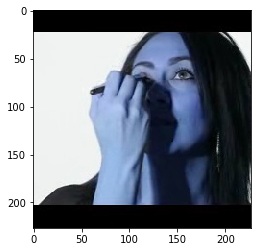

In [158]:
X2 = X[:5000]
y2 = y[:5000]
plt.imshow(X2[1])
plt.show()

X2 = X2/255.0
#X2 = X2.astype('float32')

# Determine if X2 array is the correct shape (-1, 227, 277, 3)

In [159]:
X2.shape

(5000, 227, 227, 3)

# The Model and its Layers

In [160]:
model = Sequential()

model.add(Conv2D(96, (11,11), strides=(4,4), input_shape = (227,227,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2)))

model.add(Conv2D(256, (5,5), strides=(1,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2)))

model.add(Flatten())
model.add(Dense(128))

model.add(Dense(101))
model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fitting the Models

In [162]:
model.fit(X2, y2, batch_size = 32, epochs = 3, validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/3
4500/4500 [==============================] - 389s 87ms/sample - loss: 1.5286 - accuracy: 0.5633 - val_loss: 0.4787 - val_accuracy: 0.8600
Epoch 2/3
4500/4500 [==============================] - 381s 85ms/sample - loss: 0.2583 - accuracy: 0.9271 - val_loss: 0.1718 - val_accuracy: 0.9460
Epoch 3/3
4500/4500 [==============================] - 358s 80ms/sample - loss: 0.0678 - accuracy: 0.9820 - val_loss: 0.0859 - val_accuracy: 0.9700


# Test Predictions

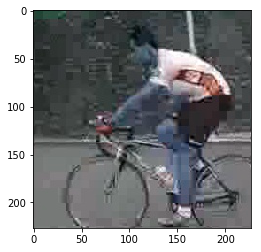

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Biking


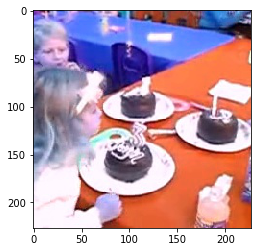

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
BlowingCandles


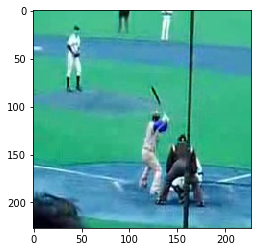

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
BaseballPitch


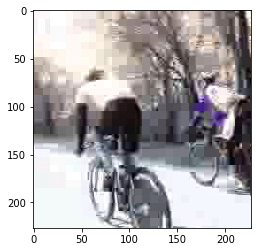

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Biking


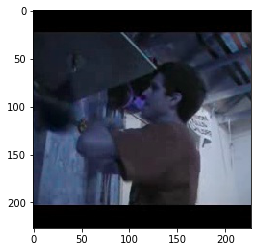

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
BoxingSpeedBag


In [166]:
PredictIMG = X[5500:5515]

predict = model.predict(PredictIMG)

plt.imshow(X[5500])
plt.show()
print(predict[0])
print(CATEGORIES[y[5500]])

plt.imshow(X[5501])
plt.show()
print(predict[1])
print(CATEGORIES[y[5501]])


plt.imshow(X[5502])
plt.show()
print(predict[2])
print(CATEGORIES[y[5502]])


plt.imshow(X[5503])
plt.show()
print(predict[3])
print(CATEGORIES[y[5503]])


plt.imshow(X[5504])
plt.show()
print(predict[4])
print(CATEGORIES[y[5504]])